In [13]:
date = '2019-12-20_21'
root_dir = '/Users/Leo/Documents/github/GradProj/'
example_label_file = root_dir + 'DataSet/result/' + date + '/stream_tag.txt'
example_label_df = pd.read_table(example_label_file, sep='\s+', header=None)
example_label_df[3] = 443
example_label_df[4].value_counts()

zhihu      3488
weibo      2705
douyin     2072
hupu       1217
toutiao    1058
Name: 4, dtype: int64

In [14]:
import os
import pandas as pd
import numpy as np
import json

In [15]:
ciper_suits = {
    '1305':0,
    'C030':1,
	'C02C':2,
	'C028':3,
	'C024':4,
	'C014':5,
	'C00A':6,
	'00A5':7,
	'00A3':8,
	'00A1':9,
	'009F':10,
	'006B':11,
	'006A':12,
	'0069':13,
	'0068':14,
	'0039':15,
	'0038':16,
	'0037':17,
	'0036':18,
	'0088':19,
	'0087':20,
	'0086':21,
	'0085':22,
	'C019':23,
	'00A7':24,
	'006D':25,
	'003A':26,
	'0089':27,
	'C032':28,
	'C02E':29,
	'C02A':30,
	'C026':31,
	'C00F':32,
	'C005':33,
	'009D':34,
	'003D':35,
	'0035':36,
	'0084':37,
	'008D':38,
	'C02F':39,
	'C02B':40,
	'C027':41,
	'C023':42,
	'C013':43,
	'C009':44,
	'00A4':45,
	'00A2':46,
	'00A0':47,
	'009E':48,
	'0067':49,
	'0040':50,
	'003F':51,
	'003E':52,
	'0033':53,
	'0032':54,
	'0031':55,
	'0030':56,
	'009A':57,
	'0099':58,
	'0098':59,
	'0097':60,
	'0045':61,
	'0044':62,
	'0043':63,
	'0042':64,
	'C018':65,
	'00A6':66,
	'006C':67,
	'0034':68,
	'009B':69,
	'0046':70,
	'C031':71,
	'C02D':72,
	'C029':73,
	'C025':74,
	'C00E':75,
	'C004':76,
	'009C':77,
	'003C':78,
	'002F':79,
	'0096':80,
	'0041':81,
	'008C':82,
	'C012':83,
	'C008':84,
	'0016':85,
	'0013':86,
	'0010':87,
	'000D':88,
	'C017':89,
	'001B':90,
	'C00D':91,
	'C003':92,
	'000A':93,
	'0007':94,
	'008B':95,
	'0021':96,
	'001F':97,
	'0025':98,
	'0023':99,
	'C011':100,
	'C007':101,
	'C016':102,
	'0018':103,
	'C00C':104,
	'C002':105,
	'0005':106,
	'0004':107,
	'008A':108,
	'0020':109,
	'0024':110,
	'C010':111,
	'C006':112,
	'C015':113,
	'C00B':114,
	'C001':115,
	'003B':116,
	'0002':117,
	'0001':118,
    '1301':119,
	'1302':120,
	'1303':121,
	'1304':122
}

In [16]:
extensions = { 
    0:0, 
    1:1, 
    2:2, 
    3:3, 
    4:4, 
    5:5, 
    6:6, 
    7:7, 
    8:8, 
    9:9, 
    10:10, 
    11:11, 
    12:12, 
    13:13, 
    14:14, 
    15:15, 
    16:16, 
    17:17, 
    18:18, 
    19:19, 
    20:20, 
    21:21, 
    22:22, 
    23:23, 
    24:24, 
    25:25, 
    26:26, 
    27:27, 
    28:28, 
    29:29, 
    30:30, 
    31:31, 
    35:32, 
    65281:33 
}

In [17]:
#TODO: 加入cipher suites，extensions特征
stream_stat_json_file = root_dir + 'DataSet/result/' + date + '/stream_stat.txt'
stm2cipherDict = dict()
stm2extenDict = dict()
with open(stream_stat_json_file) as f:
    lines = f.readlines()
    for line in lines:
        line = json.loads(line)
        flow_key = (line['sip'], line['sport'], line['dip'], line['dport'])
        cipher_suites = line['tls']['cipher_suites']
        extension_list = line['tls']['extensions_list']
        stm2cipherDict[flow_key] = cipher_suites
        stm2extenDict[flow_key] = extension_list

In [18]:
example_label = {tuple(example_label_df.iloc[i,0:4].values):example_label_df.iloc[i,4] for i in example_label_df.index}

In [25]:
example_json_file = root_dir + 'DataSet/result/' + date + '/ssl_stat.txt'
example_json_f = open(example_json_file, 'r')
#array_shape = (1771,6)
result_data = list()
result_label = list()
result_key = list()
i = 0
for line in example_json_f.readlines():
    example_json = ''
    try:
        example_json = json.loads(line)
    except Exception:
        continue
    #标签
    try:
        flow_key = (example_json['sip'], example_json['sport'], example_json['dip'], example_json['dport'])
        result_label.append(example_label[flow_key])
        result_key.append(flow_key)
        ciphers = stm2cipherDict[flow_key]
        extensions_list = stm2extenDict[flow_key]
    except Exception:
        continue
    #print(example_json)
    san_count = 0
    cert_length = [0,0,0,0]
    if 'san' in example_json:
        san_count = len(example_json['san'].split(';'))
    cert = example_json['Cert']
    cert_count = cert['cert_count']
    if cert_count != 0:
        cert_length = [c['length'] for c in cert['cert_list']]
    for i in range(4 - len(cert_length)):
        cert_length.append(0)
    result = [san_count, cert_count]
    result += cert_length
    #print(len(result))
    
    #tls
    extensions_arr = np.zeros(34, dtype=np.uint8)
    cipher_suits_arr = np.zeros(123, dtype=np.uint8)
    for extension in extensions_list:
        try:
            extensions_arr[extensions[extension]]=1
        except Exception:
            pass
    for cipher in ciphers:
        try:
            cipher = cipher.upper()
            cipher_suits_arr[ciper_suits[cipher]]=1
        except Exception:
            pass
    result += list(cipher_suits_arr)
    result += list(extensions_arr)
    result_data.append(result)
    i += 1
    
extensions_head = list()
for i in range(len(extensions)):
    extensions_head.append('extension'+str(i))
cipher_head = ['cipher'+str(i) for i in range(len(ciper_suits))]
base_head = ['san_count', 'cert_count', 'cert_length1', 'cert_length2', 'cert_length3','cert_length4']
header = base_head+cipher_head+extensions_head
result_df = pd.DataFrame(result_data, columns=header)
result_df['label'] = np.array(result_label)

print('end')
'''
keys = set(example_label.keys()).difference(set(result_key))
example_keys = example_label_df.iloc[:,0:4].values.copy()
for i,value in enumerate(list(example_keys)):
    #print(tuple(value))
    if tuple(value) in keys:
        print(i)
'''

end


'\nkeys = set(example_label.keys()).difference(set(result_key))\nexample_keys = example_label_df.iloc[:,0:4].values.copy()\nfor i,value in enumerate(list(example_keys)):\n    #print(tuple(value))\n    if tuple(value) in keys:\n        print(i)\n'

In [30]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

164
                    precision    recall        f1
LogisticRegression   0.886296  0.886296  0.886296
SVM                  0.897751  0.897751  0.897751
GaussianNB           0.694103  0.694103  0.694103
tree                 0.911328  0.911328  0.911328
RandomForest         0.905388  0.905388  0.905388


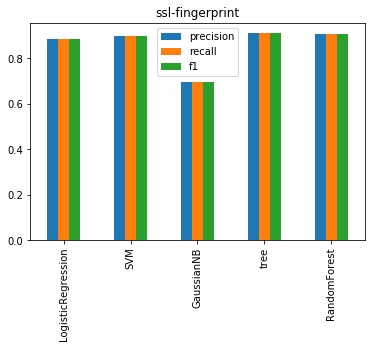

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score,precision_score
import random
examples = result_df.values.copy()
print(len(examples[0]))
score_df = pd.DataFrame(np.zeros((5,3)),index = ['LogisticRegression', 'SVM', 'GaussianNB', 'tree', 'RandomForest'], \
                        columns = ['precision', 'recall', 'f1'])
#def a():
f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = LogisticRegression()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['LogisticRegression'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = SVC()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['SVM'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = GaussianNB()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['GaussianNB'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = tree.DecisionTreeClassifier()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['tree'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = RandomForestClassifier()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
 
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['RandomForest'] = scores
print(score_df)
ax = score_df.plot.bar(title='ssl-fingerprint')
fig = ax.get_figure()
#fig.savefig('../figure/ssl.svg')